In [88]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
csv_file = '../Data_Cleanup/outCSV/Station_ID_with_AvgIdleDaytimesDays_and_lonlat.csv'
df = pd.read_csv(csv_file)

In [112]:
df["idle_time"] = pd.to_timedelta(df["idle_time"])
sorted_df = df.sort_values(by="idle_time", ascending=False)
sorted_df.head(11)

,end_station_id,idle_time,morgens,vormittags,mittags,nachmittags,abends,nachts,monday,tuesday,wednesday,thursday,friday,saturday,sunday,end_station_lat,end_station_lon
215,4403,293 days 23:18:23.586206896,43,90,113,43,43,43,42,42,42,43,43,43,136,[33.943359],[-118.248238]
156,4321,16 days 08:02:23.571428571,13,15,16,14,11,12,3,6,6,5,9,5,5,[34.031399],[-118.453629]
31,3039,16 days 06:44:38.608695652,36,59,93,63,34,34,34,34,34,34,34,34,113,[34.024479],[-118.393867]
191,4363,13 days 15:34:22.466666666,12,13,12,8,11,12,6,6,9,10,10,9,8,[34.03046],[-118.389099]
239,4432,10 days 23:02:06.598639455,87,94,110,120,91,76,52,61,66,46,56,53,56,[34.139568],[-118.362251]
0,3000,9 days 05:12:06.872673225,24159,24135,23267,21077,20537,23368,16863,16607,16410,16415,16576,17174,18639,[34.0485],[-118.258537]
67,4125,6 days 10:55:51.340740740,102,100,100,103,94,102,69,67,65,71,72,65,70,[33.766659],[-118.261017]
293,4499,4 days 07:56:51.736526946,121,111,91,103,121,135,73,85,76,81,78,75,77,[34.186569],[-118.388008]
197,4379,4 days 05:48:50.310344827,70,68,46,46,54,66,34,40,38,36,37,45,40,[34.017368],[-118.420601]
202,4384,3 days 21:52:50.006711409,125,124,107,102,87,121,61,70,61,59,64,60,65,[33.990318],[-118.412048]


We can see that the station 4403 has an unnormal idle_time, my first idea would be to filter the original data by the station id and plot the idle_time of each trip against the start time of the trip

In [84]:
full_data = pd.read_csv("../Data_Cleanup/outCSV/Metro_Set_DayAndDayTimes.csv", index_col=0)
full_data.info()

C:\Users\moham\AppData\Local\Temp\ipykernel_15756\2567257019.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  full_data = pd.read_csv("../Data_Cleanup/outCSV/Metro_Set_DayAndDayTimes.csv", index_col=0)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1552782 entries, 690312 to 827163
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1552782 non-null  int64  
 1   start_time         1552782 non-null  object 
 2   end_time           1552782 non-null  object 
 3   start_station_id   1552782 non-null  int64  
 4   start_station_lat  1552782 non-null  float64
 5   start_station_lon  1552782 non-null  float64
 6   end_station_id     1552782 non-null  int64  
 7   end_station_lat    1552782 non-null  float64
 8   end_station_lon    1552782 non-null  float64
 9   bike_id            1552782 non-null  object 
 10  idle_time          1551807 non-null  object 
 11  morgens            1552782 non-null  int64  
 12  vormittags         1552782 non-null  int64  
 13  mittags            1552782 non-null  int64  
 14  nachmittags        1552782 non-null  int64  
 15  abends             1552782 n

C:\Users\moham\AppData\Local\Temp\ipykernel_15756\3008536503.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['idle_time'] = pd.to_timedelta(station_data['idle_time']).dt.total_seconds() / (24 * 60 * 60)


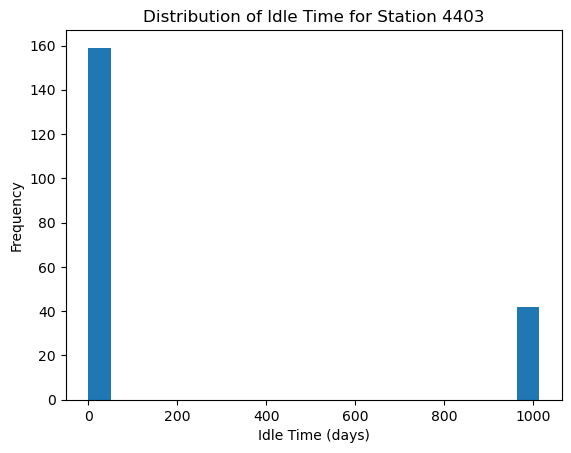

In [79]:
# Filter the rows for the station with ID 4403
station_data = full_data[(full_data['start_station_id'] == 4403) | (full_data['end_station_id'] == 4403)]

# Convert the idle_time column to numeric values in days
station_data['idle_time'] = pd.to_timedelta(station_data['idle_time']).dt.total_seconds() / (24 * 60 * 60)

# Create a histogram of idle_time values
plt.hist(station_data['idle_time'], bins=20)
plt.xlabel('Idle Time (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Idle Time for Station 4403')
plt.show()


Looking at the Histogramm we can see that we have around 40 rows that has more than 1000 days in idle time.
It seems tht there has been a huge break in the usage in this station, let try to find it.

In [81]:
station_data = full_data[(full_data['start_station_id'] == 4403) | (full_data['end_station_id'] == 4403)]
station_data['start_time'] = pd.to_datetime(station_data["start_time"])
station_data['end_time'] = pd.to_datetime(station_data["end_time"])

# Convert 'idle_time' column to Timedelta
station_data['idle_time'] = pd.to_timedelta(station_data['idle_time'])
# Filter the rows for the station with ID 4403 and idle_time over 1000 days
long_idle_trips = station_data[station_data["idle_time"] > pd.Timedelta(days=1000)]
# Sort the trips by end_time in ascending order
long_idle_trips = long_idle_trips.sort_values('end_time')

# Initialize an empty DataFrame to store the comparison results
comparison_results = pd.DataFrame(columns=['Trip', 'End Time', 'Next Start Time'])

# Iterate over the rows of the long_idle_trips DataFrame
for index, row in long_idle_trips.iterrows():
    end_time = row['end_time']
    for index, row in station_data.iterrows():
        if row["start_time"] > end_time:
            next_start_time = row["start_time"]
    comparison_results = pd.concat([comparison_results, pd.DataFrame({'Trip': [index], 'End Time': [end_time], 'Next Start Time': [next_start_time]})], ignore_index=True)

# Print the comparison results
print(comparison_results)


C:\Users\moham\AppData\Local\Temp\ipykernel_15756\1087672297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['start_time'] = pd.to_datetime(station_data["start_time"])
C:\Users\moham\AppData\Local\Temp\ipykernel_15756\1087672297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['end_time'] = pd.to_datetime(station_data["end_time"])
C:\Users\moham\AppData\Local\Temp\ipykernel_15756\1087672297.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

      Trip            End Time     Next Start Time
0   944376 2020-02-23 13:58:00 2022-12-04 14:54:00
1   944376 2020-02-23 13:58:00 2022-12-04 14:54:00
2   944376 2020-02-23 14:00:00 2022-12-04 14:54:00
3   944376 2020-02-23 14:02:00 2022-12-04 14:54:00
4   944376 2020-02-23 14:02:00 2022-12-04 14:54:00
5   944376 2020-02-23 14:05:00 2022-12-04 14:54:00
6   944376 2020-02-23 14:07:00 2022-12-04 14:54:00
7   944376 2020-02-23 14:07:00 2022-12-04 14:54:00
8   944376 2020-02-23 14:09:00 2022-12-04 14:54:00
9   944376 2020-02-23 14:10:00 2022-12-04 14:54:00
10  944376 2020-02-23 14:10:00 2022-12-04 14:54:00
11  944376 2020-02-23 14:10:00 2022-12-04 14:54:00
12  944376 2020-02-23 14:11:00 2022-12-04 14:54:00
13  944376 2020-02-23 14:11:00 2022-12-04 14:54:00
14  944376 2020-02-23 14:14:00 2022-12-04 14:54:00
15  944376 2020-02-23 14:15:00 2022-12-04 14:54:00
16  944376 2020-02-23 14:16:00 2022-12-04 14:54:00
17  944376 2020-02-23 14:18:00 2022-12-04 14:54:00
18  944376 2020-02-23 14:18:00 

Looking at the data we can see that no one used the station between 2020-02-23 15:09:00 and 2022-12-04 14:54:00

C:\Users\moham\AppData\Local\Temp\ipykernel_15756\3508911153.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_stations["end_station_id"] = top_10_stations["end_station_id"].astype(str)


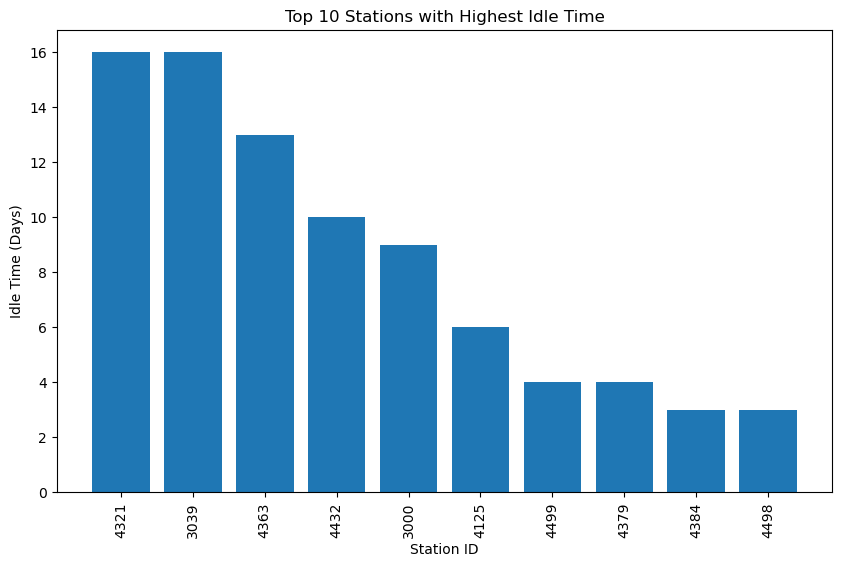

In [109]:
import matplotlib.pyplot as plt

# Filter the sorted_df to exclude outliers with more than 30 days of idle time
filtered_df = sorted_df[sorted_df['idle_time'] <= pd.Timedelta(days=30)]

# Take the top 10 stations with the highest idle time
top_10_stations = filtered_df.head(10)

# Convert the end_station_id to string
top_10_stations["end_station_id"] = top_10_stations["end_station_id"].astype(str)

# Plot the vertical bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_stations["end_station_id"], top_10_stations["idle_time"].dt.days)

# Set the chart title and axis labels
plt.title("Top 10 Stations with Highest Idle Time")
plt.xlabel("Station ID")
plt.ylabel("Idle Time (Days)")

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()


C:\Users\moham\AppData\Local\Temp\ipykernel_15756\926450887.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_10_stations["end_station_id"] = bottom_10_stations["end_station_id"].astype(str)


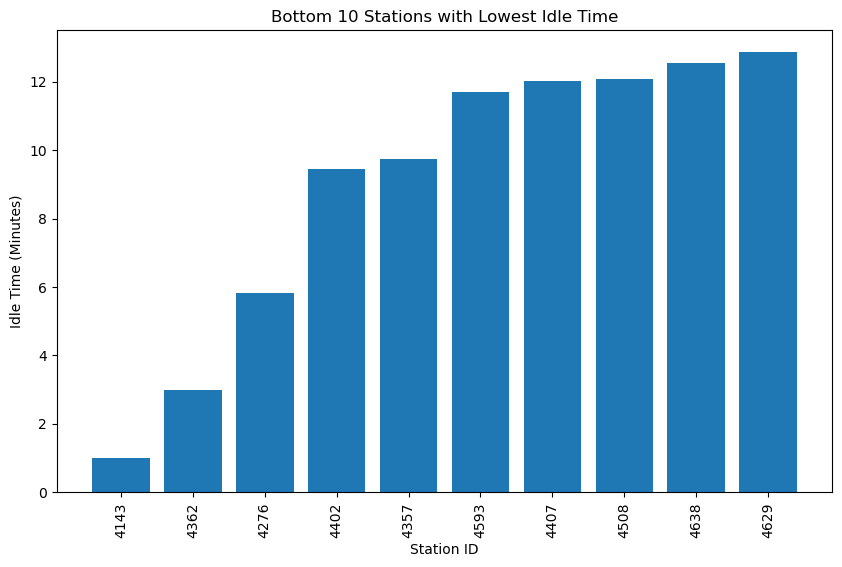

In [115]:
import matplotlib.pyplot as plt

# Sort the dataframe by idle_time in ascending order
df["idle_time"] = pd.to_timedelta(df["idle_time"])
sorted_df = df.sort_values(by="idle_time")

# Filter out outliers with more than 30 days of idle time
filtered_df = sorted_df[sorted_df["idle_time"] <= pd.Timedelta(days=30)]

# Select the bottom 10 stations with the lowest idle time
bottom_10_stations = filtered_df.head(10)

# Convert the end_station_id to string
bottom_10_stations["end_station_id"] = bottom_10_stations["end_station_id"].astype(str)

# Plot the vertical bar chart
plt.figure(figsize=(10, 6))
plt.bar(bottom_10_stations["end_station_id"], bottom_10_stations["idle_time"].dt.total_seconds()/60)

# Set the chart title and axis labels
plt.title("Bottom 10 Stations with Lowest Idle Time")
plt.xlabel("Station ID")
plt.ylabel("Idle Time (Minutes)")

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()
